# The Scent of Success

## Group 7
### Simran Kaur
### Nikhil Nair
### Meenal Gaba
### Krittika Deshwal
### Sardar Muhammad Ahmad Ali

## Setup

In [1]:
!pip install selenium spacy
!pip install pandas gensim pyldavis
!pip install --upgrade ipykernel IPython
!python -m spacy download en_core_web_md
!apt-get -q update
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

  Using cached pyLDAvis-3.4.1-py3-none-any.whl (2.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,

2023-10-12 14:11:06.092544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 14:11:07.265457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:

## Imports

In [1]:
import re
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/amazon_prod_data_scraper.csv'

product_df = pd.read_csv(file_path)
product_df

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...
1,B00GW7TT02,https://www.amazon.com/1-0-oz-Eau-Parfum-Yello...,Estee Lauder Beautiful Eau de Parfum Spray for...,35,4.6,347 ratings,Brand New\nOriginal Item\nFactory Sealed\nNeve...,https://www.amazon.com/1-0-oz-Eau-Parfum-Yello...
2,B01ELWU4NU,https://www.amazon.com/18-21-Man-Made-Tobacco-...,"18.21 Man Made Men’s Cologne, Sweet Tobacco Fr...",86,4.3,"1,371 ratings",A MASCULINE AROMA: Our signature oil blend wil...,https://www.amazon.com/18-21-Man-Made-Tobacco-...
3,B0BM5B8F3Y,https://www.amazon.com/21-Rue-Parfum-Womens-Pe...,Rue 21 21 Black Eau De Parfum Women's Perfume ...,21,4.5,247 ratings,Tropical and Beachy Perfume: Sail away to your...,https://www.amazon.com/21-Rue-Parfum-Womens-Pe...
4,B0BGM8ZM4F,https://www.amazon.com/3-4-Oud-Wood-Parfum-For...,3.4 Oz Oud Wood Eau De Parfum for Tom Ford 100...,169,3.4,15 ratings,3.4 Oz Oud Wood Eau De Parfum for Tom Ford 100...,https://www.amazon.com/3-4-Oud-Wood-Parfum-For...
...,...,...,...,...,...,...,...,...
1785,B00CDRB36S,https://www.amazon.com/Yves-Sistelle-Passion-P...,Yves de Sistelle Only Me Passion Eau De Parfum...,21,4.6,977 ratings,Yves De Sistelle\nFragrance & Perfume\nFragran...,https://www.amazon.com/Yves-Sistelle-Passion-P...
1786,B016APRFQU,https://www.amazon.com/Yves-Sistelle-Toilette-...,Yves De Sistelle Anonymous Eau de Toilette Spr...,17,4.6,611 ratings,For all skin types\nLong lasting fragrance\nIt...,https://www.amazon.com/Yves-Sistelle-Toilette-...
1787,B003UU2KW8,https://www.amazon.com/Z-14-Halston-Cologne-Sp...,Halston Z-14 By Halston Cologne Spray 8 Oz Men,25,4.6,"1,424 ratings",Halston Z-14 By Halston Cologne Spray 8 Oz Men...,https://www.amazon.com/Z-14-Halston-Cologne-Sp...
1788,B01L29UBTM,https://www.amazon.com/Zadig-Voltaire-women-Pa...,This is Her Zadig & Voltaire for women Eau de ...,75,4.4,351 ratings,A fresh and intense mix of flowery and woody n...,https://www.amazon.com/Zadig-Voltaire-women-Pa...


In [4]:
# Read in the original CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/amazon_prod_reviews_scraper.csv'
review_df = pd.read_csv(file_path)
review_df

,Product ASIN,reviewer_name,reviewer_date,reviewer_title,review_body
0,B08H8S61FY,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...
1,B08H8S61FY,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...
2,B08H8S61FY,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍
3,B08H8S61FY,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...
4,B08H8S61FY,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...
...,...,...,...,...,...
6876,B07TR75W9H,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...
6877,B07TR75W9H,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ..."
6878,B07TR75W9H,Herb A. Genelly III,"Reviewed in the United States on August 4, 2021",Much better than the from the jar.,"The spray not only cools and soothes dry skin,..."
6879,B07TR75W9H,Eileen S.,"Reviewed in the United States on March 27, 2023",so not worth it,Ordered this product to save time but it reall...


In [5]:
final_df = pd.merge(product_df, review_df, on='Product ASIN', how='left')
final_df = final_df.drop_duplicates().dropna()
final_df

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...
...,...,...,...,...,...,...,...,...,...,...,...,...
12300,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...
12301,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ..."
12302,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Herb A. Genelly III,"Reviewed in the United States on August 4, 2021",Much better than the from the jar.,"The spray not only cools and soothes dry skin,..."
12303,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Eileen S.,"Reviewed in the United States on March 27, 2023",so not worth it,Ordered this product to save time but it reall...


## Attributes

In [6]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
def preprocess_text(text, extra_stopwords = []):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (common words like "the", "and", "in") using NLTK's stopwords list
    stop_words = set(stopwords.words('english') + extra_stopwords)
    words = [word for word in words if word not in stop_words]

    # Lemmatize words to their base form using NLTK's WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin the words to form the preprocessed text
    preprocessed_text = ' '.join(words)

    return preprocessed_text

In [9]:
all_reviews = ' '.join(final_df['review_body'].dropna().astype(str).tolist())
preprocessed_all_reviews = preprocess_text(all_reviews, ['scent', 'perfume',	'fragrance', 'ml', 'ive', 'pefume', 'head', 'color', 'taste', 'flavor', 'smell', 'aroma', 'nose', 'good', 'nice', 'bad'])
preprocessed_all_reviews[:1000]

'wear suit krispy fresh outfit fall winter money rose feminine straight masculine touch well balanced juice first impression amazing sweet break world meant fall winter never smelled mfk oud satin mood smell like better definitely purchase definitely cool weather love powdery unisex shared girlfriend boyfriend close oud satin mood definitely worth buying smell ok like powdery pack skittle lol reach honestly still smell suppose absolutely beautiful watching many review youtube ministry oud finally decided pull trigger oud satin oud satin dupe popular maison francis kurkdjian oud satin mood beginning dry absolutely beautiful extremely similar original inspired regret purchase great performance beautiful beautiful bottle cologne stand also extrait de parfum mean oil concentration thank later suprised notified item shipped ups instead amazon mean missed parcel time adjust schedule miss forth time purchase item reason great smell like jo malone velvet rose oud mfk projection quite collectio

In [10]:
# Calculate word frequencies using Counter
words = word_tokenize(preprocessed_all_reviews)

# Use NLTK to tag words with their parts of speech (POS)
tagged_words = nltk.pos_tag(words)

# Filter for adjectives and nouns
adjectives_and_nouns = [word for word, pos in tagged_words if pos in ['JJ', 'JJR', 'NN', 'NNS']]

word_freq = Counter(adjectives_and_nouns)
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

n = 30
top_n_words = dict(list(sorted_word_freq.items())[:n])
top_n_words_df = pd.DataFrame(list(top_n_words.items()), columns=['Word', 'Frequency'])

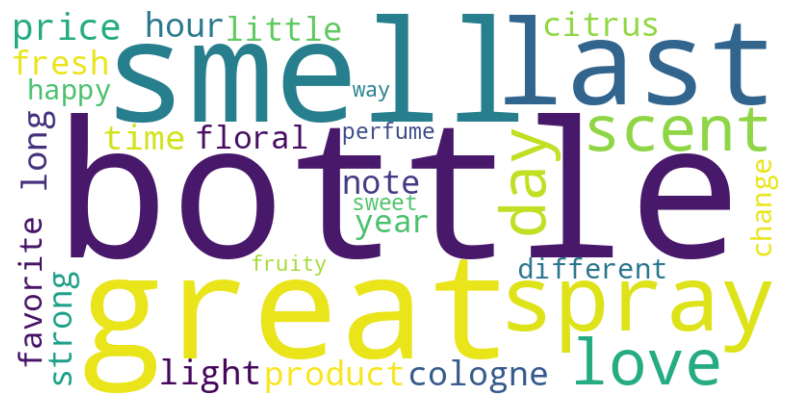

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_n_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
top_n_words_df[:20].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,bottle,great,smell,last,spray,love,scent,day,price,long,light,time,cologne,product,hour,little,citrus,strong,fresh,note
Frequency,2786,1815,1742,1528,1176,1024,1017,987,980,901,894,890,852,830,808,777,772,766,755,743


In [13]:
# Selecting and save 3 attributes
attr_dict = {'attributes': ['citrus', 'fresh', 'light']}
attr_df = pd.DataFrame(attr_dict)

file_path = '/content/drive/MyDrive/Colab Notebooks/perfume_attributes.csv'
attr_df.to_csv(file_path, index=False)
print(f"CSV file saved in Google Drive at: {file_path}")

CSV file saved in Google Drive at: /content/drive/MyDrive/Colab Notebooks/perfume_attributes.csv


## Word Vector

### Similarity

In [14]:
import spacy
import numpy as np

2023-10-12 14:13:54.021246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 14:13:56.400916: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
# Load spaCy's smaller English model with word vectors
nlp = spacy.load('en_core_web_md')

In [16]:
file_path = '/content/drive/MyDrive/Colab Notebooks/perfume_attributes.csv'
df_attr = pd.read_csv(file_path)

df_attr['attributes_processed'] = df_attr['attributes'].dropna().astype(str).apply(preprocess_text)
df_attr

,attributes,attributes_processed
0,citrus,citrus
1,fresh,fresh
2,light,light


In [17]:
final_df['review_processed'] = final_df['review_body'].astype(str).apply(preprocess_text)
final_df

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...,spray lotion saved peeling easy apply back coo...
12301,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ...",course lotion great willing pay price thought ...
12302,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Herb A. Genelly III,"Reviewed in the United States on August 4, 2021",Much better than the from the jar.,"The spray not only cools and soothes dry skin,...",spray cool soothes dry skin apply way evenly l...
12303,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Eileen S.,"Reviewed in the United States on March 27, 2023",so not worth it,Ordered this product to save time but it reall...,ordered product save time really huge disappoi...


In [18]:
# Process the text data in your DataFrames
df_attr['attributes_doc'] = df_attr['attributes_processed'].apply(nlp)
final_df['review_doc'] = final_df['review_processed'].apply(nlp)

In [19]:
df_attr.head()

,attributes,attributes_processed,attributes_doc
0,citrus,citrus,(citrus)
1,fresh,fresh,(fresh)
2,light,light,(light)


In [20]:
final_df.head()

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...,"(wear, suit, krispy, fresh, outfit, fall, wint..."
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...,"(first, impression, amazing, sweet, break, wor..."
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,,()
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...,"(never, smelled, mfk, oud, satin, mood, smell,..."
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...,"(love, smell, powdery, unisex, fragrance, shar..."


In [22]:
df_sim_wv = final_df.copy()

# Calculate and store similarities using lambda functions
df_sim_wv['attr_1_sim_score'] = df_sim_wv['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
df_sim_wv['attr_2_sim_score'] = df_sim_wv['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
df_sim_wv['attr_3_sim_score'] = df_sim_wv['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))

# Add a new column for the average similarity score
df_sim_wv['avg_sim_score'] = df_sim_wv[['attr_1_sim_score', 'attr_2_sim_score', 'attr_3_sim_score']].mean(axis=1)

df_sim_wv

/tmp/ipykernel_3477/2955547650.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv['attr_1_sim_score'] = df_sim_wv['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
/tmp/ipykernel_3477/2955547650.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv['attr_2_sim_score'] = df_sim_wv['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
/tmp/ipykernel_3477/2955547650.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv['attr_3_sim_score'] = df_sim_wv['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))


,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...,"(wear, suit, krispy, fresh, outfit, fall, wint...",0.478875,0.615917,0.599200,0.564664
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...,"(first, impression, amazing, sweet, break, wor...",0.311762,0.454310,0.547237,0.437770
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,,(),0.000000,0.000000,0.000000,0.000000
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...,"(never, smelled, mfk, oud, satin, mood, smell,...",0.481821,0.582472,0.527984,0.530759
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...,"(love, smell, powdery, unisex, fragrance, shar...",0.402348,0.482561,0.413937,0.432949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...,spray lotion saved peeling easy apply back coo...,"(spray, lotion, saved, peeling, easy, apply, b...",0.328917,0.518771,0.555764,0.467817
12301,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ...",course lotion great willing pay price thought ...,"(course, lotion, great, willing, pay, price, t...",0.231716,0.388631,0.493787,0.371378
12302,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Herb A. Genelly III,"Reviewed in the United S

In [23]:
df_sim_wv.describe()

,product_price,product_ratings,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score
count,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000
mean,33.017645,4.297983,0.352692,0.466615,0.495602,0.438303
std,18.020005,0.242735,0.116210,0.111119,0.129948,0.109307
min,5.000000,3.400000,-0.060298,-0.098777,-0.106150,-0.048278
25%,21.000000,4.100000,0.278697,0.404102,0.418592,0.372761
50%,31.000000,4.300000,0.360204,0.480019,0.516707,0.454380
75%,35.000000,4.500000,0.428751,0.543317,0.587027,0.520315
max,169.000000,5.000000,1.000000,0.863889,0.857273,0.701996


### Sentiment

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
update_words = df_attr['attributes_processed'].tolist()
for attr in update_words:
    sia.lexicon[attr] = 0

In [29]:
# Function to calculate combined sentiment score
def calculate_combined_sentiment(review_text):
    sentiment_scores = sia.polarity_scores(review_text)
    compound_score = sentiment_scores['compound']
    return sentiment_scores['compound']

In [30]:
# Apply the function to calculate combined sentiment scores and add a new column
df_sim_wv['senti_score'] = df_sim_wv['review_processed'].apply(calculate_combined_sentiment)
df_sim_wv

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...,"(wear, suit, krispy, fresh, outfit, fall, wint...",0.478875,0.615917,0.599200,0.564664,0.4588
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...,"(first, impression, amazing, sweet, break, wor...",0.311762,0.454310,0.547237,0.437770,0.8271
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,,(),0.000000,0.000000,0.000000,0.000000,0.0000
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...,"(never, smelled, mfk, oud, satin, mood, smell,...",0.481821,0.582472,0.527984,0.530759,0.9501
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...,"(love, smell, powdery, unisex, fragrance, shar...",0.402348,0.482561,0.413937,0.432949,0.7650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...,spray lotion saved peeling easy apply back coo...,"(spray, lotion, saved, peeling, easy, apply, b...",0.328917,0.518771,0.555764,0.467817,0.9716
12301,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ...",course lotion great willing pay price thought ...,"(course, lotion, great, willing, pay, price, t...",0.231716,0.388631,0.493787,0.371378,0.9118
12302,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquapho

### Evaluation Score

In [31]:
df_sim_wv.describe()

,product_price,product_ratings,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
count,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000
mean,33.017645,4.297983,0.352692,0.466615,0.495602,0.438303,0.636142
std,18.020005,0.242735,0.116210,0.111119,0.129948,0.109307,0.400240
min,5.000000,3.400000,-0.060298,-0.098777,-0.106150,-0.048278,-0.941900
25%,21.000000,4.100000,0.278697,0.404102,0.418592,0.372761,0.458800
50%,31.000000,4.300000,0.360204,0.480019,0.516707,0.454380,0.784500
75%,35.000000,4.500000,0.428751,0.543317,0.587027,0.520315,0.931400
max,169.000000,5.000000,1.000000,0.863889,0.857273,0.701996,0.999000


In [32]:
# Normalizes the any column to between 0 and 1
def normalize_column(df, column_name):
    column = df[column_name]
    normalized_column = (column - column.min()) / (column.max() - column.min())
    df[column_name] = round(normalized_column, 2)
    return df

In [33]:
df_sim_wv = normalize_column(df_sim_wv, 'attr_1_sim_score')
df_sim_wv = normalize_column(df_sim_wv, 'attr_2_sim_score')
df_sim_wv = normalize_column(df_sim_wv, 'attr_3_sim_score')
df_sim_wv = normalize_column(df_sim_wv, 'avg_sim_score')
df_sim_wv = normalize_column(df_sim_wv, 'senti_score')
df_sim_wv

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...,"(wear, suit, krispy, fresh, outfit, fall, wint...",0.51,0.74,0.73,0.82,0.72
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...,"(first, impression, amazing, sweet, break, wor...",0.35,0.57,0.68,0.65,0.91
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,,(),0.06,0.10,0.11,0.06,0.49
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...,"(never, smelled, mfk, oud, satin, mood, smell,...",0.51,0.71,0.66,0.77,0.97
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...,"(love, smell, powdery, unisex, fragrance, shar...",0.44,0.60,0.54,0.64,0.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...,spray lotion saved peeling easy apply back coo...,"(spray, lotion, saved, peeling, easy, apply, b...",0.37,0.64,0.69,0.69,0.99
12301,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ...",course lotion great willing pay price thought ...,"(course, lotion, great, willing, pay, price, t...",0.28,0.51,0.62,0.56,0.96
12302,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Herb A. Genelly III,"Reviewed in the United States on August 4, 2021",Much better than the from the jar.,"

In [34]:
df_sim_wv.describe()

,product_price,product_ratings,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
count,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000
mean,33.017645,4.297983,0.389459,0.587134,0.624494,0.648474,0.813171
std,18.020005,0.242735,0.109526,0.115355,0.134955,0.145880,0.205825
min,5.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,4.100000,0.320000,0.520000,0.540000,0.560000,0.720000
50%,31.000000,4.300000,0.400000,0.600000,0.650000,0.670000,0.890000
75%,35.000000,4.500000,0.460000,0.670000,0.720000,0.760000,0.970000
max,169.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_sim_wv['eval_score'] = np.round(df_sim_wv['avg_sim_score']*0.6 + df_sim_wv['senti_score']*0.4, 2)
df_sim_wv.head()

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score,eval_score
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...,"(wear, suit, krispy, fresh, outfit, fall, wint...",0.51,0.74,0.73,0.82,0.72,0.78
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...,"(first, impression, amazing, sweet, break, wor...",0.35,0.57,0.68,0.65,0.91,0.75
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,,(),0.06,0.10,0.11,0.06,0.49,0.23
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...,"(never, smelled, mfk, oud, satin, mood, smell,...",0.51,0.71,0.66,0.77,0.97,0.85
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...,"(love, smell, powdery, unisex, fragrance, shar...",0.44,0.60,0.54,0.64,0.88,0.74


In [36]:
df_sim_wv.describe()

,product_price,product_ratings,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score,eval_score
count,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000,8331.000000
mean,33.017645,4.297983,0.389459,0.587134,0.624494,0.648474,0.813171,0.714310
std,18.020005,0.242735,0.109526,0.115355,0.134955,0.145880,0.205825,0.142921
min,5.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
25%,21.000000,4.100000,0.320000,0.520000,0.540000,0.560000,0.720000,0.630000
50%,31.000000,4.300000,0.400000,0.600000,0.650000,0.670000,0.890000,0.750000
75%,35.000000,4.500000,0.460000,0.670000,0.720000,0.760000,0.970000,0.830000
max,169.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.930000


In [37]:
result_wv_df = df_sim_wv.groupby('Product ASIN').agg({
    'review_body': 'count',
    # 'rating': 'mean',
    'avg_sim_score': 'mean',
    'senti_score': 'mean',
    'eval_score': 'mean',
}).reset_index().round(2)

result_wv_df = result_wv_df.rename(columns={
    'review_body': 'Review Count',
    # 'rating': 'Avg Prod Rating',
    'avg_sim_score': 'Avg Prod Similarity Score',
    'senti_score': 'Avg Prod Senti Score',
    'eval_score': 'Avg Prod Eval Score'
})

result_wv_df

,Product ASIN,Review Count,Avg Prod Similarity Score,Avg Prod Senti Score,Avg Prod Eval Score
0,B0009MHXPY,99,0.57,0.74,0.64
1,B000B63O0Q,97,0.64,0.77,0.69
2,B000C1VWSG,94,0.56,0.79,0.65
3,B000C1Z19C,100,0.64,0.77,0.69
4,B000C1Z1B0,98,0.58,0.77,0.65
...,...,...,...,...,...
90,B0C8YL925M,48,0.72,0.95,0.81
91,B0CCGZ45PL,4,0.67,0.85,0.74
92,B0CCJYTSMD,1,0.60,0.94,0.74
93,B0CGMRVRWF,3,0.61,0.81,0.69


In [38]:
top_3_wv_products = result_wv_df.sort_values(by='Avg Prod Eval Score', ascending=False).head(10)
top_3_wv_products

,Product ASIN,Review Count,Avg Prod Similarity Score,Avg Prod Senti Score,Avg Prod Eval Score
86,B0BSRD9WNV,100,0.75,0.90,0.81
90,B0C8YL925M,48,0.72,0.95,0.81
84,B0BQF23K6V,1900,0.75,0.90,0.81
85,B0BQF29FLQ,1000,0.75,0.90,0.81
40,B01ELWU4NU,99,0.66,0.88,0.75
69,B08XVXJVSG,2,0.65,0.89,0.74
91,B0CCGZ45PL,4,0.67,0.85,0.74
92,B0CCJYTSMD,1,0.60,0.94,0.74
26,B00BF27PGY,93,0.67,0.85,0.74
51,B07NQ72P4L,45,0.68,0.81,0.73


In [39]:
selected_products = top_3_wv_products["Product ASIN"].tolist()
filtered_wv_df = df_sim_wv[df_sim_wv['Product ASIN'].isin(selected_products)].copy()
result_df_wv_agg= filtered_wv_df.groupby('Product ASIN').agg({'attr_1_sim_score': 'mean', 'attr_2_sim_score': 'mean', 'attr_3_sim_score': 'mean'}).reset_index().copy()
result_df_wv_agg = result_df_wv_agg.rename(columns={'attr_1_sim_score': 'Avg Attr 1 Sim Score', 'attr_2_sim_score': 'Avg Attr 2 Sim Score', 'attr_3_sim_score': 'Avg Attr 3 Sim Score'})
result_df_wv_agg.head(3)

,Product ASIN,Avg Attr 1 Sim Score,Avg Attr 2 Sim Score,Avg Attr 3 Sim Score
0,B00BF27PGY,0.399355,0.602473,0.640323
1,B01ELWU4NU,0.390909,0.590808,0.653131
2,B07NQ72P4L,0.434444,0.614889,0.620222


## Recommendation by Ratings

In [40]:
final_df.sort_values(by=['product_ratings_num','product_ratings'])[:5]

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
376,B001RVKJZ2,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,"4711 Eau De Cologne, 10.1 Ounce",30,4.6,"1,032 ratings",A citrus aromatic fragrance for women and men\...,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,steven smith,"Reviewed in the United States on August 17, 2023",I love the scent,I really love the scent of this fragrance. Ver...,really love scent fragrance citrusy classic th...,"(really, love, scent, fragrance, citrusy, clas..."
377,B001RVKJZ2,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,"4711 Eau De Cologne, 10.1 Ounce",30,4.6,"1,032 ratings",A citrus aromatic fragrance for women and men\...,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,MANNY A.,"Reviewed in the United States on September 15,...",An oldie but a goodie!,I have used this cologne for many years and ye...,used cologne many year yet remains fresh first...,"(used, cologne, many, year, yet, remains, fres..."
378,B001RVKJZ2,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,"4711 Eau De Cologne, 10.1 Ounce",30,4.6,"1,032 ratings",A citrus aromatic fragrance for women and men\...,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,Kathy,"Reviewed in the United States on September 16,...",Refreshing,"My grandmother, born in1879, only used this co...",grandmother born used cologne love,"(grandmother, born, used, cologne, love)"
379,B001RVKJZ2,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,"4711 Eau De Cologne, 10.1 Ounce",30,4.6,"1,032 ratings",A citrus aromatic fragrance for women and men\...,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,wugu,"Reviewed in the United States on September 7, ...",Fast service and exactly as ordered on the ori...,See headline.,see headline,"(see, headline)"
380,B001RVKJZ2,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,"4711 Eau De Cologne, 10.1 Ounce",30,4.6,"1,032 ratings",A citrus aromatic fragrance for women and men\...,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,Harold Randall,"Reviewed in the United States on August 30, 2023",Oldie but goodie!,"Great fragrance, love it!",great fragrance love,"(great, fragrance, love)"


In [41]:
final_df[['Product ASIN', 'product_name','product_price','product_ratings','product_ratings_num','product_features']].sort_values(by='product_ratings', ascending=False).head(3)

,Product ASIN,product_name,product_price,product_ratings,product_ratings_num,product_features
8564,B0CGMRVRWF,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,34,5.0,2 ratings,Rare Carbon by Afnan is a Leather fragrance fo...
8509,B0CCGZ45PL,Adyan Oud Essential Perfume - Unisex EDP 100 m...,34,5.0,6 ratings,Captivating Top Notes: Oud Essential opens wit...
10330,B08XVXJVSG,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",75,5.0,4 ratings,ALPHA Legacy Edition by Luxedore for Men 2.03 ...


In [42]:
grp = final_df.sort_values(by=['product_ratings_num','product_ratings'])
grp.drop_duplicates(subset=['Product ASIN', 'Product Link',	'product_name',	'product_price',	'product_ratings',	'product_ratings_num'	,'product_features']).head(3)

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
376,B001RVKJZ2,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,"4711 Eau De Cologne, 10.1 Ounce",30,4.6,"1,032 ratings",A citrus aromatic fragrance for women and men\...,https://www.amazon.com/4711-Eau-Cologne-10-1-O...,steven smith,"Reviewed in the United States on August 17, 2023",I love the scent,I really love the scent of this fragrance. Ver...,really love scent fragrance citrusy classic th...,"(really, love, scent, fragrance, citrusy, clas..."
910,B00AIYHZME,https://www.amazon.com/Abercrombie-Fitch-Fierc...,Abercrombie & Fitch Fierce Cologne Spray for M...,49,4.6,"1,032 ratings",Fierce By Abercrombie & Fitch 1.7 oz Cologne S...,https://www.amazon.com/Abercrombie-Fitch-Fierc...,Taylor,"Reviewed in the United States on October 5, 2023",Smells good,My son has took over the bottle for school cau...,son took bottle school cause smell good girl say,"(son, took, bottle, school, cause, smell, good..."
10517,B01MSRH3RF,https://www.amazon.com/Alyssa-Ashley-Toilette-...,"Alyssa Ashley Eau de Toilette Spray for Women,...",32,4.6,"1,048 ratings",This product is a genuine product by its origi...,https://www.amazon.com/Alyssa-Ashley-Toilette-...,Janet Grube,"Reviewed in the United States on September 6, ...",My perfume,I love this perfume and only use it,love perfume use,"(love, perfume, use)"


## LDA

In [43]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models import Phrases
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [44]:
final_df

,Product ASIN,Product Link,product_name,product_price,product_ratings,product_ratings_num,product_features,product_review_link,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
0,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Amazon Customer,"Reviewed in the United States on October 1, 2023",Must buy!,Wear with a suit or Krispy fresh outfit! Fall ...,wear suit krispy fresh outfit fall winter mone...,"(wear, suit, krispy, fresh, outfit, fall, wint..."
1,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,G Brown,"Reviewed in the United States on September 7, ...",My 1st time,My first impression was amazing but it is swee...,first impression amazing sweet break world mea...,"(first, impression, amazing, sweet, break, wor..."
2,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Maynard,"Reviewed in the United States on May 31, 2023",👍,👍,,()
3,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,ifumusno,"Reviewed in the United States on March 21, 2023",Strong scent lasts long,I have never smelled MFK Oud Satin Mood but if...,never smelled mfk oud satin mood smell like be...,"(never, smelled, mfk, oud, satin, mood, smell,..."
4,B08H8S61FY,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Paris Corner 100ml Ministry of Oud - Oud Satin...,47,4.3,182 ratings,Oud Satin is a Oriental Woody fragrance for wo...,https://www.amazon.com/100ml-Ministry-Oud-Frag...,Reginald Matthews,"Reviewed in the United States on July 17, 2023",MFK clone,Love this smell very powdery unisex fragrance ...,love smell powdery unisex fragrance shared gir...,"(love, smell, powdery, unisex, fragrance, shar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Sam Sam,"Reviewed in the United States on June 25, 2020",Single women: great to apply lotion to your back,This spray lotion saved me from peeling. It is...,spray lotion saved peeling easy apply back coo...,"(spray, lotion, saved, peeling, easy, apply, b..."
12301,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Mimi,"Reviewed in the United States on November 25, ...",Not worth money,"Of course the lotion is great, which is why I ...",course lotion great willing pay price thought ...,"(course, lotion, great, willing, pay, price, t..."
12302,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",21,4.6,"8,428 ratings",Easy to Use Spray: Continuous spray dry skin o...,https://www.amazon.com/Aquaphor-Ointment-Body-...,Herb A. Genelly III,"Reviewed in the United States on August 4, 2021",Much better than the from the jar.,"The spray not only cools and soothes dry skin,...",spray cool soothes dry skin apply way evenly l...,"(spray, cool, soothes, dry, skin, apply, way, ..."
12303,B07TR75W9H,https://www.amazon.com/Aquaphor-Ointment-Body-...,"Aquaphor Healing Ointment Body Spray, Moisturi...",

In [45]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply preprocessing to the review_text column
final_df['tokens'] = final_df['review_processed'].apply(tokenize_text)

In [46]:
# Create a Dictionary and Corpus for LDA
id2word = corpora.Dictionary(final_df['tokens'])
corpus = [id2word.doc2bow(text) for text in final_df['tokens']]

# Train an LDA model
topics = 10
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=topics)
for idx in range(topics):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, topics))

Topic #0: 0.030*"one" + 0.022*"fragrance" + 0.020*"floor" + 0.019*"bottle" + 0.017*"get" + 0.013*"time" + 0.012*"smell" + 0.012*"better" + 0.012*"star" + 0.012*"perfume"
Topic #1: 0.071*"smell" + 0.061*"spray" + 0.041*"long" + 0.029*"day" + 0.027*"nice" + 0.026*"last" + 0.024*"lasting" + 0.022*"good" + 0.018*"really" + 0.015*"loved"
Topic #2: 0.041*"scent" + 0.029*"smell" + 0.020*"skin" + 0.020*"like" + 0.015*"bottle" + 0.014*"great" + 0.012*"spray" + 0.012*"perfume" + 0.010*"think" + 0.010*"feel"
Topic #3: 0.032*"scent" + 0.026*"smell" + 0.025*"perfume" + 0.017*"fragrance" + 0.016*"bottle" + 0.014*"last" + 0.014*"long" + 0.013*"favorite" + 0.012*"like" + 0.010*"would"
Topic #4: 0.032*"fragrance" + 0.024*"love" + 0.023*"smell" + 0.017*"would" + 0.017*"scent" + 0.017*"perfume" + 0.015*"bottle" + 0.015*"perfect" + 0.014*"spray" + 0.014*"like"
Topic #5: 0.029*"smell" + 0.024*"like" + 0.017*"product" + 0.016*"cologne" + 0.015*"dry" + 0.014*"back" + 0.013*"love" + 0.012*"bottle" + 0.012*"sc

In [47]:
# Enable the notebook for visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds', R=30)
vis

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.133223  0.203535       1        1  17.815110
8      0.038342  0.060832       2        1  17.380319
6     -0.037902 -0.011853       3        1  11.603558
2     -0.052868  0.214049       4        1  10.944052
3      0.021097 -0.218248       5        1  10.589981
0     -0.205416  0.112931       6        1   7.382695
7     -0.116571 -0.169468       7        1   7.007499
4     -0.240117 -0.056660       8        1   6.396364
9      0.214718 -0.153596       9        1   5.941156
1      0.245496  0.018478      10        1   4.939265, topic_info=           Term         Freq        Total Category  logprob  loglift
27         good  2453.000000  2453.000000  Default  30.0000  30.0000
37        smell  5968.000000  5968.000000  Default  29.0000  29.0000
628       spray  2441.000000  2441.000000  Default  28.0000  28.0000
42         love  2393.000000  2393.000000  Default  27.0000  27.0000
3     fragrance  2598.000000  2598.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
165      strong    79.939605   789.592350  Topic10  -4.7679   0.7177
380       price    82.012175  1064.527440  Topic10  -4.7423   0.4445
26   definitely    72.484809   717.313591  Topic10  -4.8658   0.7158
308      little    68.934645   810.676620  Topic10  -4.9160   0.5432
108        time    66.500019  1009.269961  Topic10  -4.9520   0.2882

[779 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3835      5  0.942978  ability
168       1  0.053764     able
168       2  0.161292     able
168       3  0.253458     able
168       4  0.015361     able
...     ...       ...      ...
184       7  0.015424     year
184       8  0.007712     year
184       9  0.035474     year
184      10  0.006169     year
1903      8  0.960151   yellow

[2424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 7, 3, 4, 1, 8, 5, 10, 2])

# Long Tail

## Long Tail Plot

In [53]:
product_df['product_ratings_num'] = product_df['product_ratings_num'].str.split(' ').str[0]
product_df['product_ratings_num'] = pd.to_numeric(product_df['product_ratings_num'].str.replace(',', ''))

AttributeError: ignored

In [54]:
# Get unique combinations based on 'col1' and 'col2'
df_new = product_df[['product_name','Product ASIN', 'product_ratings_num','product_features','product_ratings','product_price']].drop_duplicates().sort_values(by='product_ratings_num')

# Rank 'col1' based on 'col2' in descending order
df_new['rank'] = df_new['product_ratings_num'].rank(ascending=False)
df_new

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank
214,Bath & Body Works Halloween Fragrance Mist - 3...,B0CFKJDRH2,1,Bath & Body Works Halloween Fragrance Mist – 3...,5.0,34,1635.5
1509,SIMU Women/Men Perfume Spray 3.4 Fl. OZ. (B st...,B0C4FY6SDV,1,A style :The fragrance is sweet and dreamy-Gir...,5.0,95,1635.5
307,"BURBERRY Weekend Eau De Parfum for Women, 3.3 ...",B0CH4TG7PJ,1,Weekend for Women by Burberry is a Floral frag...,5.0,59,1635.5
601,"Explorer Mont Blanc, Eau De Perfume Spray 3.3 ...",B0CJBKM6ZB,1,Long-Lasting Fragrance: Explorer Eau De Perfum...,5.0,79,1635.5
1273,Paris Corner CAMARO HOMME INTENSE EDP 100ml Un...,B0CBXYW1Y8,1,Camaro by Paris Corner Perfumes is an exquisit...,5.0,41,1635.5
...,...,...,...,...,...,...,...
1649,Vera Wang Princess Eau de Toilette Spray for W...,B000JL7WQK,50023,FRUIT-FORWARD TOP NOTES - This scent opens wit...,4.5,25,5.0
1703,Victoria's Secret Bare Vanilla Body Spray for ...,B07JRG42D9,56465,Victoria’s Secret Bare Vanilla body mist is a ...,4.6,17,4.0
1385,Pure Instinct Roll-On - The Original Pheromone...,B00EJDG7XI,77761,"More than 20 years ago, Pure Instinct changed ...",3.9,16,3.0
1674,"Versace Pour Homme by Versace, 0.17 Ounce",B001MSR7UU,78679,A classic designer fragrance for men\nPerfect ...,4.5,8,2.0


NaN in 'rank_bin': 0


/tmp/ipykernel_3477/3164962526.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_new.groupby('rank_bin')['product_ratings_num'].mean()


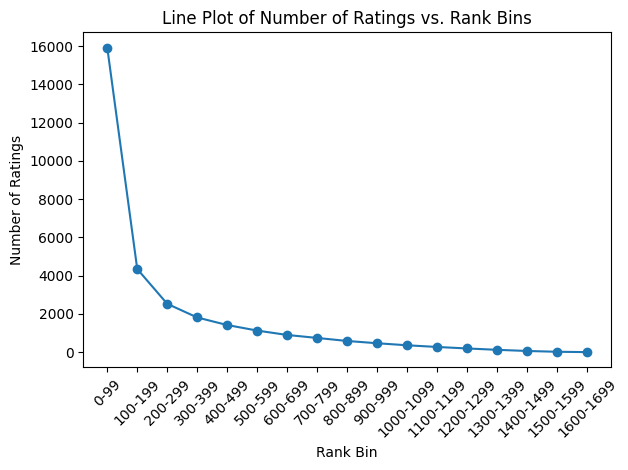

In [61]:
# Convert necessary columns to numeric
df_new['rank'] = pd.to_numeric(df_new['rank'], errors='coerce')
df_new['product_ratings_num'] = pd.to_numeric(df_new['product_ratings_num'], errors='coerce')

# Creating bins of rank in 100-interval
bins = range(0, int(df_new['rank'].max()) + 100, 100)
labels = [f"{i}-{i+99}" for i in bins[:-1]]

df_new['rank_bin'] = pd.cut(df_new['rank'], bins=bins, labels=labels, right=False)

# Check for NaN in 'rank_bin' and handle if necessary
print(f"NaN in 'rank_bin': {df_new['rank_bin'].isna().sum()}")
df_new = df_new.dropna(subset=['rank_bin'])

# Group by the bins and take the mean of 'product_ratings_num'
grouped = df_new.groupby('rank_bin')['product_ratings_num'].mean()

# Plotting
plt.plot(grouped.index, grouped.values, linestyle='-', marker='o')
plt.xticks(rotation=45)
plt.xlabel('Rank Bin')
plt.ylabel('Number of Ratings')
plt.title('Line Plot of Number of Ratings vs. Rank Bins')
plt.tight_layout()

# Display the plot
plt.show()


## Splitting in 2 sets

In [62]:
high_rank_prods_df = df_new[df_new['rank'] <= 200]
low_rank_prods_df = df_new[df_new['rank'] > 1000]

In [63]:
final_high_rank_df = pd.merge(high_rank_prods_df, review_df, on='Product ASIN', how='left')
final_high_rank_df = final_high_rank_df.drop_duplicates().dropna()
final_high_rank_df

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed..."
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...
...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e..."
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing..."


In [64]:
final_low_rank_df = pd.merge(low_rank_prods_df, review_df, on='Product ASIN', how='left')
final_low_rank_df = final_low_rank_df.drop_duplicates().dropna()
final_low_rank_df

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body
6,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,DEREK,"Reviewed in the United States on September 28,...",Pure Sex,The absolute best cologne in my 14-piece colle...
7,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Iben Alvarez Marrero,"Reviewed in the United States on October 7, 2023",Iben,Good item
8,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Kevin Flores,"Reviewed in the United States on October 5, 2023",Smell,This perfume smell really good. Smelling same ...
23,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,Joe Zhereb,"Reviewed in the United States on August 25, 2023",Has become an instant favorite of mine,I’ve been using this cologne for over a week n...
24,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,daisha thomas,"Reviewed in the United States on August 2, 2023",Best one yet!!,This is the exact fragrance I was looking for....
...,...,...,...,...,...,...,...,...,...,...,...,...
2715,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,Dairo Ballate,"Reviewed in the United States on May 22, 2021",Bad product!!!,This have nothing to do with the original. Is ...
2716,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,terri metrano,"Reviewed in the United States on May 12, 2016",Five Stars,Love it. The fragrance is just right.
2717,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,Amazon Customer,"Reviewed in the United States on February 3, 2017",Five Stars,Loved it
2720,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,CARLOS MORALES,"Reviewed in the United States on December 22, ...",👍🏻,Ty


# Attributes

## High Rank Products

In [65]:
all_high_rank_reviews = ' '.join(final_high_rank_df['review_body'].dropna().astype(str).tolist())
preprocessed_all_high_rank_reviews = preprocess_text(all_high_rank_reviews, ['scent', 'perfume',	'fragrance', 'ml', 'ive', 'pefume', 'head', 'color', 'taste', 'flavor', 'smell', 'aroma', 'nose', 'good', 'nice', 'bad'])
preprocessed_all_high_rank_reviews[:1000]

'clean powering decided buy seeing youtube reaction video love instantly became go everyday wear girlfriend say favorite cologne mine woman ask wearing smelled amazing smell great last long one bottle arriving time seemed delayed went see would happen ordered another said next day shipping big birthday needed cologne per wish ordered another came time new one came went return usually problem said non returnable grrrrrrr bottle large xmas extra needed elsewhere amazon prime say return many mistake amazon xmas want call return center literally mile u froze sealed able return strong like store brand last long cologne smell really like remembered great price quality cologne really like white said loke candy great last long overpowering also expensive compared brand like puma brand love shoe two thumb great experience using king year citrus clean soft smell idea would like particular happy purchase manly certainly purchase love lady gotten cologne second time forgot smell last day definitel

In [66]:
# Calculate word frequencies using Counter
words = word_tokenize(preprocessed_all_high_rank_reviews)

# Use NLTK to tag words with their parts of speech (POS)
tagged_words = nltk.pos_tag(words)

# Filter for adjectives and nouns
adjectives_and_nouns = [word for word, pos in tagged_words if pos in ['JJ', 'JJR', 'NN', 'NNS']]

word_freq = Counter(adjectives_and_nouns)
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

n = 30
top_n_words = dict(list(sorted_word_freq.items())[:n])
top_n_words_df = pd.DataFrame(list(top_n_words.items()), columns=['Word', 'Frequency'])

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


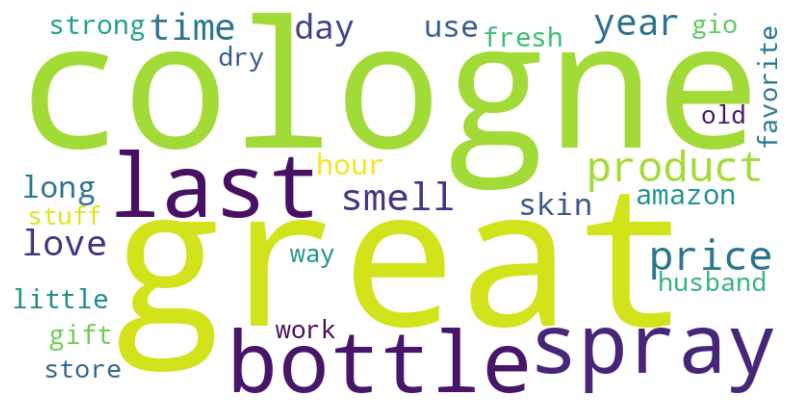

In [67]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_n_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Low Rank Products

In [68]:
all_low_rank_reviews = ' '.join(final_low_rank_df['review_body'].dropna().astype(str).tolist())
preprocessed_all_low_rank_reviews = preprocess_text(all_low_rank_reviews, ['scent', 'perfume',	'fragrance', 'ml', 'ive', 'pefume', 'head', 'color', 'taste', 'flavor', 'smell', 'aroma', 'nose', 'good', 'nice', 'bad'])
preprocessed_all_low_rank_reviews[:1000]

'absolute best cologne piece collection intoxicating connects olfactory like bluetooth crack rate highly enough item really smelling like compare description using cologne week become favorite go especially love putting public social gathering exact looking rich blended pheromone smell allure sophistication well balanced overwhelm sens subtle enough worn everyday also last forever even shower overall exact looking rich mysterious alluring honestly skeptical actually dupe definitely smell identical pretty sure last long tom ford literally smell otherwise happy order blind buy review looked oud cologne one grab attention others around men woman magnificent buying packaging presentation top notch five star product recommended highly highly recommend first thought oh powering calm leaf soft musk unique last awhile super happy highly recommended purchase perfect daily use long lasting beautiful satisfied fresh clean smell great hubby smelled awful work hard time getting opened box hit stron

In [69]:
# Calculate word frequencies using Counter
words = word_tokenize(preprocessed_all_low_rank_reviews)

# Use NLTK to tag words with their parts of speech (POS)
tagged_words = nltk.pos_tag(words)

# Filter for adjectives and nouns
adjectives_and_nouns = [word for word, pos in tagged_words if pos in ['JJ', 'JJR', 'NN', 'NNS']]

word_freq = Counter(adjectives_and_nouns)
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

n = 30
top_n_words = dict(list(sorted_word_freq.items())[:n])
top_n_words_df = pd.DataFrame(list(top_n_words.items()), columns=['Word', 'Frequency'])

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


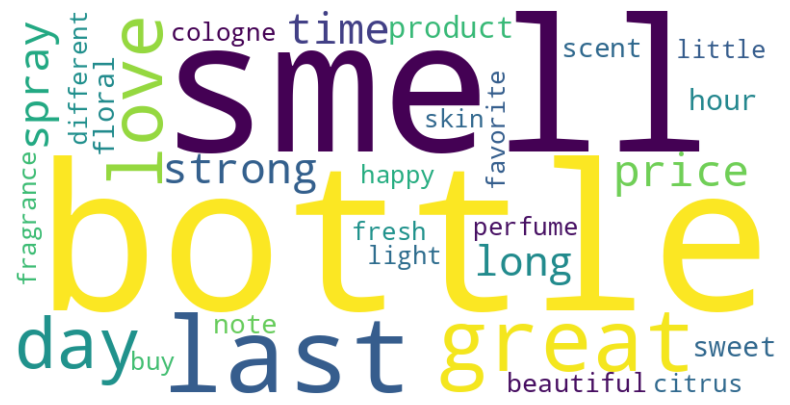

In [70]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_n_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word Vector

## High Rank Products

In [71]:
final_high_rank_df['review_processed'] = final_high_rank_df['review_body'].astype(str).apply(preprocess_text)
final_high_rank_df

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...


In [72]:
# Process the text data in your DataFrames
df_attr['attributes_doc'] = df_attr['attributes_processed'].apply(nlp)
final_high_rank_df['review_doc'] = final_high_rank_df['review_processed'].apply(nlp)

In [73]:
final_high_rank_df.head()

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)"
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide..."
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)"
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,..."
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)"


In [74]:
df_sim_wv_high_rank = final_high_rank_df.copy()

# Calculate and store similarities using lambda functions
df_sim_wv_high_rank['attr_1_sim_score'] = df_sim_wv_high_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
df_sim_wv_high_rank['attr_2_sim_score'] = df_sim_wv_high_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
df_sim_wv_high_rank['attr_3_sim_score'] = df_sim_wv_high_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))

# Add a new column for the average similarity score
df_sim_wv_high_rank['avg_sim_score'] = df_sim_wv_high_rank[['attr_1_sim_score', 'attr_2_sim_score', 'attr_3_sim_score']].mean(axis=1)

df_sim_wv_high_rank

/tmp/ipykernel_3477/2394331747.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv_high_rank['attr_1_sim_score'] = df_sim_wv_high_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
/tmp/ipykernel_3477/2394331747.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv_high_rank['attr_2_sim_score'] = df_sim_wv_high_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
/tmp/ipykernel_3477/2394331747.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv_high_rank['attr_3_sim_score'] = df_sim_wv_high_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))


,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.245175,0.484042,0.572833,0.434017
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.211170,0.343695,0.367393,0.307420
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.400127,0.498302,0.487796,0.462075
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.170278,0.372261,0.482953,0.341831
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.368952,0.516670,0.522166,0.469263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.344136,0.491811,0.501419,0.445789
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.421040,0.542209,0.472110,0.478453
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.198656,0.267219,0.447721,0.304532
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...,"(bought, several, bottle, bathing, armani, sou...",0.290977,0.392942,0.564392,0.416104


In [75]:
df_sim_wv_high_rank.describe()

,product_ratings_num,product_ratings,product_price,rank,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,6250.475083,4.587929,28.795127,114.685493,0.298059,0.423616,0.437261,0.386312
std,2897.490345,0.092863,19.646744,44.325553,0.104558,0.115243,0.130678,0.104859
min,3663.000000,4.400000,11.000000,38.000000,-0.060298,-0.056306,-0.092893,-0.026133
25%,4347.000000,4.500000,13.000000,64.000000,0.236607,0.374506,0.360158,0.333776
50%,4941.000000,4.600000,21.000000,128.000000,0.301990,0.435760,0.459692,0.403401
75%,8428.000000,4.700000,39.000000,144.000000,0.364744,0.493699,0.529699,0.453248
max,13078.000000,4.700000,64.000000,176.000000,0.674024,0.863889,0.734863,0.678212


## Low Rank Products

In [76]:
final_low_rank_df['review_processed'] = final_low_rank_df['review_body'].astype(str).apply(preprocess_text)
final_low_rank_df

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed
6,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,DEREK,"Reviewed in the United States on September 28,...",Pure Sex,The absolute best cologne in my 14-piece colle...,absolute best cologne piece collection intoxic...
7,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Iben Alvarez Marrero,"Reviewed in the United States on October 7, 2023",Iben,Good item,good item
8,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Kevin Flores,"Reviewed in the United States on October 5, 2023",Smell,This perfume smell really good. Smelling same ...,perfume smell really good smelling like perfum...
23,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,Joe Zhereb,"Reviewed in the United States on August 25, 2023",Has become an instant favorite of mine,I’ve been using this cologne for over a week n...,using cologne week become favorite go especial...
24,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,daisha thomas,"Reviewed in the United States on August 2, 2023",Best one yet!!,This is the exact fragrance I was looking for....,exact fragrance looking rich scent blended phe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,Dairo Ballate,"Reviewed in the United States on May 22, 2021",Bad product!!!,This have nothing to do with the original. Is ...,nothing original bad product buy
2716,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,terri metrano,"Reviewed in the United States on May 12, 2016",Five Stars,Love it. The fragrance is just right.,love fragrance right
2717,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,Amazon Customer,"Reviewed in the United States on February 3, 2017",Five Stars,Loved it,loved
2720,Antonio Banderas The Secret Eau De Toilette Sp...,B019MOLK2G,409,This item is not a tester\nPackaging may vary\...,4.5,22,1006.5,1000-1099,CARLOS MORALES,"Reviewed in the United States on December 22, ...",👍🏻,Ty,ty


In [77]:
# Process the text data in your DataFrames
df_attr['attributes_doc'] = df_attr['attributes_processed'].apply(nlp)
final_low_rank_df['review_doc'] = final_low_rank_df['review_processed'].apply(nlp)

In [78]:
final_low_rank_df.head()

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
6,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,DEREK,"Reviewed in the United States on September 28,...",Pure Sex,The absolute best cologne in my 14-piece colle...,absolute best cologne piece collection intoxic...,"(absolute, best, cologne, piece, collection, i..."
7,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Iben Alvarez Marrero,"Reviewed in the United States on October 7, 2023",Iben,Good item,good item,"(good, item)"
8,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Kevin Flores,"Reviewed in the United States on October 5, 2023",Smell,This perfume smell really good. Smelling same ...,perfume smell really good smelling like perfum...,"(perfume, smell, really, good, smelling, like,..."
23,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,Joe Zhereb,"Reviewed in the United States on August 25, 2023",Has become an instant favorite of mine,I’ve been using this cologne for over a week n...,using cologne week become favorite go especial...,"(using, cologne, week, become, favorite, go, e..."
24,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,daisha thomas,"Reviewed in the United States on August 2, 2023",Best one yet!!,This is the exact fragrance I was looking for....,exact fragrance looking rich scent blended phe...,"(exact, fragrance, looking, rich, scent, blend..."


In [79]:
df_sim_wv_low_rank = final_high_rank_df.copy()

# Calculate and store similarities using lambda functions
df_sim_wv_low_rank['attr_1_sim_score'] = df_sim_wv_low_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
df_sim_wv_low_rank['attr_2_sim_score'] = df_sim_wv_low_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
df_sim_wv_low_rank['attr_3_sim_score'] = df_sim_wv_low_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))

# Add a new column for the average similarity score
df_sim_wv_low_rank['avg_sim_score'] = df_sim_wv_low_rank[['attr_1_sim_score', 'attr_2_sim_score', 'attr_3_sim_score']].mean(axis=1)

df_sim_wv_low_rank

/tmp/ipykernel_3477/3272944863.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv_low_rank['attr_1_sim_score'] = df_sim_wv_low_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
/tmp/ipykernel_3477/3272944863.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv_low_rank['attr_2_sim_score'] = df_sim_wv_low_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
/tmp/ipykernel_3477/3272944863.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_wv_low_rank['attr_3_sim_score'] = df_sim_wv_low_rank['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))


,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.245175,0.484042,0.572833,0.434017
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.211170,0.343695,0.367393,0.307420
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.400127,0.498302,0.487796,0.462075
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.170278,0.372261,0.482953,0.341831
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.368952,0.516670,0.522166,0.469263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.344136,0.491811,0.501419,0.445789
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.421040,0.542209,0.472110,0.478453
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.198656,0.267219,0.447721,0.304532
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...,"(bought, several, bottle, bathing, armani, sou...",0.290977,0.392942,0.564392,0.416104


In [80]:
df_sim_wv_low_rank.describe()

,product_ratings_num,product_ratings,product_price,rank,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,6250.475083,4.587929,28.795127,114.685493,0.298059,0.423616,0.437261,0.386312
std,2897.490345,0.092863,19.646744,44.325553,0.104558,0.115243,0.130678,0.104859
min,3663.000000,4.400000,11.000000,38.000000,-0.060298,-0.056306,-0.092893,-0.026133
25%,4347.000000,4.500000,13.000000,64.000000,0.236607,0.374506,0.360158,0.333776
50%,4941.000000,4.600000,21.000000,128.000000,0.301990,0.435760,0.459692,0.403401
75%,8428.000000,4.700000,39.000000,144.000000,0.364744,0.493699,0.529699,0.453248
max,13078.000000,4.700000,64.000000,176.000000,0.674024,0.863889,0.734863,0.678212


# Sentiment

## High Rank Products

In [81]:
# Apply the function to calculate combined sentiment scores and add a new column
df_sim_wv_high_rank['senti_score'] = df_sim_wv_high_rank['review_processed'].apply(calculate_combined_sentiment)
df_sim_wv_high_rank

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.245175,0.484042,0.572833,0.434017,0.4019
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.211170,0.343695,0.367393,0.307420,0.9001
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.400127,0.498302,0.487796,0.462075,0.6249
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.170278,0.372261,0.482953,0.341831,-0.1531
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.368952,0.516670,0.522166,0.469263,0.7003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.344136,0.491811,0.501419,0.445789,0.8625
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.421040,0.542209,0.472110,0.478453,0.8360
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.198656,0.267219,0.447721,0.304532,0.0000
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...,"(bought, several, bottle, bathing, armani, sou...",0.290977,0.392942,0.564392,0.416104,0.6478


## Low Rank Products

In [82]:
# Apply the function to calculate combined sentiment scores and add a new column
df_sim_wv_low_rank['senti_score'] = df_sim_wv_low_rank['review_processed'].apply(calculate_combined_sentiment)
df_sim_wv_low_rank

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.245175,0.484042,0.572833,0.434017,0.4019
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.211170,0.343695,0.367393,0.307420,0.9001
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.400127,0.498302,0.487796,0.462075,0.6249
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.170278,0.372261,0.482953,0.341831,-0.1531
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.368952,0.516670,0.522166,0.469263,0.7003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.344136,0.491811,0.501419,0.445789,0.8625
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.421040,0.542209,0.472110,0.478453,0.8360
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.198656,0.267219,0.447721,0.304532,0.0000
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...,"(bought, several, bottle, bathing, armani, sou...",0.290977,0.392942,0.564392,0.416104,0.6478


# Evaluation Score

## High Rank Products

In [83]:
df_sim_wv_high_rank = normalize_column(df_sim_wv_high_rank, 'attr_1_sim_score')
df_sim_wv_high_rank = normalize_column(df_sim_wv_high_rank, 'attr_2_sim_score')
df_sim_wv_high_rank = normalize_column(df_sim_wv_high_rank, 'attr_3_sim_score')
df_sim_wv_high_rank = normalize_column(df_sim_wv_high_rank, 'avg_sim_score')
df_sim_wv_high_rank = normalize_column(df_sim_wv_high_rank, 'senti_score')
df_sim_wv_high_rank

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.42,0.59,0.80,0.65,0.68
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.37,0.43,0.56,0.47,0.95
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.63,0.60,0.70,0.69,0.80
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.31,0.47,0.70,0.52,0.39
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.58,0.62,0.74,0.70,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.55,0.60,0.72,0.67,0.93
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.66,0.65,0.68,0.72,0.92
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.35,0.35,0.65,0.47,0.47
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...,"(bought, several, bottle, bathing, armani, sou...",0.48,0.49,0.79,0.63,0.82


In [84]:
df_sim_wv_high_rank.describe()

,product_ratings_num,product_ratings,product_price,rank,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,6250.475083,4.587929,28.795127,114.685493,0.488084,0.521528,0.640321,0.585770,0.780631
std,2897.490345,0.092863,19.646744,44.325553,0.142430,0.125166,0.158048,0.148887,0.197607
min,3663.000000,4.400000,11.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4347.000000,4.500000,13.000000,64.000000,0.400000,0.470000,0.550000,0.510000,0.710000
50%,4941.000000,4.600000,21.000000,128.000000,0.490000,0.530000,0.670000,0.610000,0.830000
75%,8428.000000,4.700000,39.000000,144.000000,0.580000,0.600000,0.750000,0.680000,0.930000
max,13078.000000,4.700000,64.000000,176.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
df_sim_wv_high_rank['eval_score'] = np.round(df_sim_wv_high_rank['avg_sim_score']*0.6 + df_sim_wv_high_rank['senti_score']*0.4, 2)
df_sim_wv_high_rank.head()

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score,eval_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.42,0.59,0.80,0.65,0.68,0.66
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.37,0.43,0.56,0.47,0.95,0.66
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.63,0.60,0.70,0.69,0.80,0.73
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.31,0.47,0.70,0.52,0.39,0.47
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.58,0.62,0.74,0.70,0.84,0.76


In [86]:
result_high_rank_wv_df = df_sim_wv_high_rank.groupby('Product ASIN').agg({
    'review_body': 'count',
    # 'rating': 'mean',
    'avg_sim_score': 'mean',
    'senti_score': 'mean',
    'eval_score': 'mean',
}).reset_index().round(2)

result_high_rank_wv_df = result_high_rank_wv_df.rename(columns={
    'review_body': 'Review Count',
    # 'rating': 'Avg Prod Rating',
    'avg_sim_score': 'Avg Prod Similarity Score',
    'senti_score': 'Avg Prod Senti Score',
    'eval_score': 'Avg Prod Eval Score'
})

result_high_rank_wv_df

,Product ASIN,Review Count,Avg Prod Similarity Score,Avg Prod Senti Score,Avg Prod Eval Score
0,B000C213ES,96,0.59,0.78,0.67
1,B000E7YK5K,92,0.56,0.77,0.65
2,B000VOMZOY,94,0.56,0.78,0.65
3,B000XE15VG,94,0.57,0.78,0.65
4,B0020MMGRQ,98,0.57,0.78,0.65
5,B002Z7FVTQ,88,0.63,0.80,0.70
6,B00DB47CN0,87,0.55,0.78,0.64
7,B00J4SRE7G,59,0.54,0.71,0.61
8,B07TR75W9H,100,0.66,0.80,0.72
9,B0B358R6X9,95,0.60,0.79,0.68


In [87]:
top_3_high_rank_wv_products = result_high_rank_wv_df.sort_values(by='Avg Prod Eval Score', ascending=False).head(10)
top_3_high_rank_wv_products

,Product ASIN,Review Count,Avg Prod Similarity Score,Avg Prod Senti Score,Avg Prod Eval Score
8,B07TR75W9H,100,0.66,0.80,0.72
5,B002Z7FVTQ,88,0.63,0.80,0.70
9,B0B358R6X9,95,0.60,0.79,0.68
0,B000C213ES,96,0.59,0.78,0.67
1,B000E7YK5K,92,0.56,0.77,0.65
2,B000VOMZOY,94,0.56,0.78,0.65
3,B000XE15VG,94,0.57,0.78,0.65
4,B0020MMGRQ,98,0.57,0.78,0.65
6,B00DB47CN0,87,0.55,0.78,0.64
7,B00J4SRE7G,59,0.54,0.71,0.61


In [88]:
selected_high_rank_products = top_3_high_rank_wv_products["Product ASIN"].tolist()
filtered_high_rank_wv_df = df_sim_wv_high_rank[df_sim_wv_high_rank['Product ASIN'].isin(selected_high_rank_products)].copy()
result_high_rank_df_wv_agg= filtered_high_rank_wv_df.groupby('Product ASIN').agg({'attr_1_sim_score': 'mean', 'attr_2_sim_score': 'mean', 'attr_3_sim_score': 'mean'}).reset_index().copy()
result_high_rank_df_wv_agg = result_high_rank_df_wv_agg.rename(columns={'attr_1_sim_score': 'Avg Attr 1 Sim Score', 'attr_2_sim_score': 'Avg Attr 2 Sim Score', 'attr_3_sim_score': 'Avg Attr 3 Sim Score'})
result_high_rank_df_wv_agg.head(3)

,Product ASIN,Avg Attr 1 Sim Score,Avg Attr 2 Sim Score,Avg Attr 3 Sim Score
0,B000C213ES,0.468333,0.513333,0.671146
1,B000E7YK5K,0.478370,0.503261,0.601630
2,B000VOMZOY,0.468404,0.512128,0.613404


## Similarity on Product Description

In [121]:
df_sim_wv_high_rank['features_processed'] = df_sim_wv_high_rank['product_features'].astype(str).apply(preprocess_text)

In [122]:
products_to_filter = ['B000C213ES', 'B000E7YK5K', 'B000VOMZOY']
filtered_df_high = df_sim_wv_high_rank[df_sim_wv_high_rank['Product ASIN'].isin(products_to_filter)]

In [123]:
filtered_df_high['feat_doc'] = filtered_df_high['features_processed'].apply(nlp)
filtered_df_high

/tmp/ipykernel_3477/3207900321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_high['feat_doc'] = filtered_df_high['features_processed'].apply(nlp)


,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,...,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score,eval_score,features_processed,feat_doc
356,Acqua Di Gio Pour Homme By Giorgio Armani Eau-...,B000C213ES,4384,"Introduced by Giorgio Armani in 1997, Acqua Di...",4.7,64,141.0,100-199,Pam,"Reviewed in the United States on October 2, 2023",...,love clean classy scent husband worn year requ...,"(love, clean, classy, scent, husband, worn, ye...",0.42,0.53,0.66,0.57,0.98,0.73,introduced giorgio armani acqua di gio sharp a...,"(introduced, giorgio, armani, acqua, di, gio, ..."
357,Acqua Di Gio Pour Homme By Giorgio Armani Eau-...,B000C213ES,4384,"Introduced by Giorgio Armani in 1997, Acqua Di...",4.7,64,141.0,100-199,Dani C.,"Reviewed in the United States on October 2, 2023",...,good deal cologne light powering nice clean scent,"(good, deal, cologne, light, powering, nice, c...",0.67,0.71,0.96,0.86,0.90,0.88,introduced giorgio armani acqua di gio sharp a...,"(introduced, giorgio, armani, acqua, di, gio, ..."
358,Acqua Di Gio Pour Homme By Giorgio Armani Eau-...,B000C213ES,4384,"Introduced by Giorgio Armani in 1997, Acqua Di...",4.7,64,141.0,100-199,NF,"Reviewed in the United States on September 10,...",...,unsure reviewer issue seller product authentic...,"(unsure, reviewer, issue, seller, product, aut...",0.47,0.48,0.74,0.60,0.38,0.51,introduced giorgio armani acqua di gio sharp a...,"(introduced, giorgio, armani, acqua, di, gio, ..."
359,Acqua Di Gio Pour Homme By Giorgio Armani Eau-...,B000C213ES,4384,"Introduced by Giorgio Armani in 1997, Acqua Di...",4.7,64,141.0,100-199,Henry Tran,"Reviewed in the United States on September 17,...",...,love fast shipping best price course different...,"(love, fast, shipping, best, price, course, di...",0.39,0.49,0.66,0.55,0.97,0.72,introduced giorgio armani acqua di gio sharp a...,"(introduced, giorgio, armani, acqua, di, gio, ..."
360,Acqua Di Gio Pour Homme By Giorgio Armani Eau-...,B000C213ES,4384,"Introduced by Giorgio Armani in 1997, Acqua Di...",4.7,64,141.0,100-199,R.A. Oden,"Reviewed in the United States on October 4, 2023",...,best,(best),0.29,0.41,0.34,0.35,0.81,0.53,introduced giorgio armani acqua di gio sharp a...,"(introduced, giorgio, armani, acqua, di, gio, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.55,0.60,0.72,0.67,0.93,0.77,fragrance family earthy woody top note marine ...,"(fragrance, family, earthy, woody, top, note, ..."
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",...,amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.66,0.65,0.68,0.72,0.92,0.80,fragrance family earthy woody top note marine ...,"(fragrance, family, earthy, woody, top, note, ..."
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.35,0.35,0.65,0.47,0.47,0.47,fragrance family earthy woody top note marine ...,"(fragrance, family, earthy, woody, top, note, ..."
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",...,bought several bottle bat

In [125]:
df_sim_vw_high = filtered_df_high.copy()

# Calculate and store similarities using lambda functions
df_sim_vw_high['attr_1_sim_score'] = df_sim_vw_high['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
df_sim_vw_high['attr_2_sim_score'] = df_sim_vw_high['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
df_sim_vw_high['attr_3_sim_score'] = df_sim_vw_high['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))

# Add a new column for the average similarity score
df_sim_vw_high['avg_sim_score'] = df_sim_vw_high[['attr_1_sim_score', 'attr_2_sim_score', 'attr_3_sim_score']].mean(axis=1)


df_sim_vw_high.groupby('Product ASIN')['avg_sim_score'].mean()

/tmp/ipykernel_3477/698709378.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_high['attr_1_sim_score'] = df_sim_vw_high['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
/tmp/ipykernel_3477/698709378.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_high['attr_2_sim_score'] = df_sim_vw_high['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
/tmp/ipykernel_3477/698709378.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_high['attr_3_sim_score'] = df_sim_vw_high['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))


Product ASIN
B000C213ES    0.387193
B000E7YK5K    0.367763
B000VOMZOY    0.371336
Name: avg_sim_score, dtype: float64

## Low Rank Products

In [89]:
df_sim_wv_low_rank = normalize_column(df_sim_wv_low_rank, 'attr_1_sim_score')
df_sim_wv_low_rank = normalize_column(df_sim_wv_low_rank, 'attr_2_sim_score')
df_sim_wv_low_rank = normalize_column(df_sim_wv_low_rank, 'attr_3_sim_score')
df_sim_wv_low_rank = normalize_column(df_sim_wv_low_rank, 'avg_sim_score')
df_sim_wv_low_rank = normalize_column(df_sim_wv_low_rank, 'senti_score')
df_sim_wv_low_rank

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.42,0.59,0.80,0.65,0.68
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.37,0.43,0.56,0.47,0.95
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.63,0.60,0.70,0.69,0.80
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.31,0.47,0.70,0.52,0.39
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.58,0.62,0.74,0.70,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",A little disappointing,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.55,0.60,0.72,0.67,0.93
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",Legit,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.66,0.65,0.68,0.72,0.92
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",just right,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.35,0.35,0.65,0.47,0.47
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Aaron L Mcfadden,"Reviewed in the United States on February 9, 2023",Smells amazing,"I bought several bottles, just because bathing...",bought several bottle bathing armani sounded l...,"(bought, several, bottle, bathing, armani, sou...",0.48,0.49,0.79,0.63,0.82


In [90]:
df_sim_wv_low_rank.describe()

,product_ratings_num,product_ratings,product_price,rank,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,6250.475083,4.587929,28.795127,114.685493,0.488084,0.521528,0.640321,0.585770,0.780631
std,2897.490345,0.092863,19.646744,44.325553,0.142430,0.125166,0.158048,0.148887,0.197607
min,3663.000000,4.400000,11.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4347.000000,4.500000,13.000000,64.000000,0.400000,0.470000,0.550000,0.510000,0.710000
50%,4941.000000,4.600000,21.000000,128.000000,0.490000,0.530000,0.670000,0.610000,0.830000
75%,8428.000000,4.700000,39.000000,144.000000,0.580000,0.600000,0.750000,0.680000,0.930000
max,13078.000000,4.700000,64.000000,176.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
df_sim_wv_low_rank['eval_score'] = np.round(df_sim_wv_low_rank['avg_sim_score']*0.6 + df_sim_wv_low_rank['senti_score']*0.4, 2)
df_sim_wv_low_rank.head()

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score,eval_score
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)",0.42,0.59,0.80,0.65,0.68,0.66
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide...",0.37,0.43,0.56,0.47,0.95,0.66
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)",0.63,0.60,0.70,0.69,0.80,0.73
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,...",0.31,0.47,0.70,0.52,0.39,0.47
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)",0.58,0.62,0.74,0.70,0.84,0.76


In [92]:
result_low_rank_wv_df = df_sim_wv_low_rank.groupby('Product ASIN').agg({
    'review_body': 'count',
    # 'rating': 'mean',
    'avg_sim_score': 'mean',
    'senti_score': 'mean',
    'eval_score': 'mean',
}).reset_index().round(2)

result_low_rank_wv_df = result_low_rank_wv_df.rename(columns={
    'review_body': 'Review Count',
    # 'rating': 'Avg Prod Rating',
    'avg_sim_score': 'Avg Prod Similarity Score',
    'senti_score': 'Avg Prod Senti Score',
    'eval_score': 'Avg Prod Eval Score'
})

result_low_rank_wv_df

,Product ASIN,Review Count,Avg Prod Similarity Score,Avg Prod Senti Score,Avg Prod Eval Score
0,B000C213ES,96,0.59,0.78,0.67
1,B000E7YK5K,92,0.56,0.77,0.65
2,B000VOMZOY,94,0.56,0.78,0.65
3,B000XE15VG,94,0.57,0.78,0.65
4,B0020MMGRQ,98,0.57,0.78,0.65
5,B002Z7FVTQ,88,0.63,0.80,0.70
6,B00DB47CN0,87,0.55,0.78,0.64
7,B00J4SRE7G,59,0.54,0.71,0.61
8,B07TR75W9H,100,0.66,0.80,0.72
9,B0B358R6X9,95,0.60,0.79,0.68


In [93]:
top_3_low_rank_wv_products = result_low_rank_wv_df.sort_values(by='Avg Prod Eval Score', ascending=False).head(10)
top_3_low_rank_wv_products

,Product ASIN,Review Count,Avg Prod Similarity Score,Avg Prod Senti Score,Avg Prod Eval Score
8,B07TR75W9H,100,0.66,0.80,0.72
5,B002Z7FVTQ,88,0.63,0.80,0.70
9,B0B358R6X9,95,0.60,0.79,0.68
0,B000C213ES,96,0.59,0.78,0.67
1,B000E7YK5K,92,0.56,0.77,0.65
2,B000VOMZOY,94,0.56,0.78,0.65
3,B000XE15VG,94,0.57,0.78,0.65
4,B0020MMGRQ,98,0.57,0.78,0.65
6,B00DB47CN0,87,0.55,0.78,0.64
7,B00J4SRE7G,59,0.54,0.71,0.61


In [94]:
selected_low_rank_products = top_3_low_rank_wv_products["Product ASIN"].tolist()
filtered_low_rank_wv_df = df_sim_wv_low_rank[df_sim_wv_low_rank['Product ASIN'].isin(selected_low_rank_products)].copy()
result_low_rank_df_wv_agg= filtered_low_rank_wv_df.groupby('Product ASIN').agg({'attr_1_sim_score': 'mean', 'attr_2_sim_score': 'mean', 'attr_3_sim_score': 'mean'}).reset_index().copy()
result_low_rank_df_wv_agg = result_low_rank_df_wv_agg.rename(columns={'attr_1_sim_score': 'Avg Attr 1 Sim Score', 'attr_2_sim_score': 'Avg Attr 2 Sim Score', 'attr_3_sim_score': 'Avg Attr 3 Sim Score'})
result_low_rank_df_wv_agg.head(3)

,Product ASIN,Avg Attr 1 Sim Score,Avg Attr 2 Sim Score,Avg Attr 3 Sim Score
0,B000C213ES,0.468333,0.513333,0.671146
1,B000E7YK5K,0.478370,0.503261,0.601630
2,B000VOMZOY,0.468404,0.512128,0.613404


In [161]:
# Sample DataFrame
data = {
    'attributes_processed': ['rosemary', 'spice', 'jasmine']
}

df_attr = pd.DataFrame(data)

# Applying nlp to 'attributes_processed' and storing result in 'attributes_doc'
df_attr['attributes_doc'] = df_attr['attributes_processed'].apply(nlp)

In [165]:
products_to_filter = ['B000E7YK5K', 'B000E7YK5K', 'B000VOMZOY']
filtered_df_low1 = df_sim_wv_low_rank[df_sim_wv_low_rank['Product ASIN'].isin(products_to_filter)]

In [166]:
filtered_df_low1['rev_doc'] = filtered_df_low1['review_processed'].apply(nlp)

/tmp/ipykernel_3477/1147284165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_low1['rev_doc'] = filtered_df_low1['review_processed'].apply(nlp)


In [167]:
df_sim_vw_low = filtered_df_low1.copy()

# Calculate and store similarities using lambda functions
df_sim_vw_low['attr_1_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
df_sim_vw_low['attr_2_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
df_sim_vw_low['attr_3_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))

# Add a new column for the average similarity score
df_sim_vw_low['avg_sim_score'] = df_sim_vw_low[['attr_1_sim_score', 'attr_2_sim_score', 'attr_3_sim_score']].mean(axis=1)

df_sim_vw_low.groupby('Product ASIN')['avg_sim_score'].mean()

/tmp/ipykernel_3477/3580873086.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_low['attr_1_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
/tmp/ipykernel_3477/3580873086.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_low['attr_2_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
/tmp/ipykernel_3477/3580873086.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_low['attr_3_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))


Product ASIN
B000E7YK5K    0.338922
B000VOMZOY    0.327856
Name: avg_sim_score, dtype: float64

## Similarity on Product Description

In [126]:
df_sim_wv_low_rank['features_processed'] = df_sim_wv_low_rank['product_features'].astype(str).apply(preprocess_text)

In [154]:
products_to_filter = ['B000E7YK5K'] #, 'B000E7YK5K', 'B000VOMZOY']
filtered_df_low = df_sim_wv_low_rank[df_sim_wv_low_rank['Product ASIN'].isin(products_to_filter)]
filtered_df_low

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,...,review_body,review_processed,review_doc,attr_1_sim_score,attr_2_sim_score,attr_3_sim_score,avg_sim_score,senti_score,eval_score,features_processed
1053,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,loneliness 😔: please put down your phone and t...,"Reviewed in the United States on September 18,...",...,I have been using this for a long time.\nI hea...,using long time hear smell good lol type atten...,"(using, long, time, hear, smell, good, lol, ty...",0.48,0.53,0.72,0.62,0.92,0.74,fragrance family earthy woody top note marine ...
1054,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Flora,"Reviewed in the United States on September 28,...",...,My husband has been using Bvlgari perfume for ...,husband using bvlgari perfume long time first ...,"(husband, using, bvlgari, perfume, long, time,...",0.51,0.57,0.77,0.67,0.94,0.78,fragrance family earthy woody top note marine ...
1055,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Frank Tuttle,"Reviewed in the United States on September 25,...",...,The pros:\n\n* Makes me smell good.\n* Inexpen...,pro make smell good inexpensive good daily cas...,"(pro, make, smell, good, inexpensive, good, da...",0.40,0.52,0.83,0.63,0.97,0.77,fragrance family earthy woody top note marine ...
1056,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Jesus,"Reviewed in the United States on September 21,...",...,I've tried SO MANY scents and never get the ri...,tried many scent never get right one lean towa...,"(tried, many, scent, never, get, right, one, l...",0.54,0.59,0.80,0.70,0.92,0.79,fragrance family earthy woody top note marine ...
1057,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Adam R Couden,"Reviewed in the United States on August 14, 2023",...,"Armani has tons of great products as it is, bu...",armani ton great product well known giorgi arm...,"(armani, ton, great, product, well, known, gio...",0.51,0.58,0.77,0.67,1.00,0.80,fragrance family earthy woody top note marine ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Amazon Customer,"Reviewed in the United States on February 25, ...",...,It's been well over a decade since I have last...,well decade since last worn fragrance remember...,"(well, decade, since, last, worn, fragrance, r...",0.55,0.60,0.72,0.67,0.93,0.77,fragrance family earthy woody top note marine ...
1149,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,Michael dieter,"Reviewed in the United States on March 2, 2023",...,"Amazing cologne great smell, not a knock off e...",amazing cologne great smell knock either,"(amazing, cologne, great, smell, knock, either)",0.66,0.65,0.68,0.72,0.92,0.80,fragrance family earthy woody top note marine ...
1150,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...,4.7,64,38.0,0-99,T. M.,"Reviewed in the United States on February 14, ...",...,I have had this before and now is one of my tw...,one two go scent armani code,"(one, two, go, scent, armani, code)",0.35,0.35,0.65,0.47,0.47,0.47,fragrance family earthy woody top note marine ...
1151,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",B000E7YK5K,13078,Fragrance Family: Earthy & Woody\nTop N

In [139]:
filtered_df_low['product_features'].unique()

array(['Introduced by Giorgio Armani in 1997, Acqua Di Gio is a sharp aquatic fragrance\nThis Perfume has a blend of citrus, rosemary, spice, jasmine, woods and ocean breezes\nIt is recommended for daytime or evening casual.\nThis item is not for sale in Catalina Island\nEau de toilette spray\n6.7 ounce\nThis item is not a tester'],
      dtype=object)

In [133]:
all_reviews = ' '.join(filtered_df_low['product_features'].dropna().astype(str).tolist())
preprocessed_all_reviews = preprocess_text(all_reviews, ['scent', 'perfume',	'fragrance', 'ml', 'ive', 'pefume', 'head', 'color', 'taste', 'flavor', 'smell', 'aroma', 'nose', 'good', 'nice', 'bad'])
preprocessed_all_reviews[:1000]

'introduced giorgio armani acqua di gio sharp aquatic blend citrus rosemary spice jasmine wood ocean breeze recommended daytime evening casual item sale catalina island eau de toilette spray ounce item tester introduced giorgio armani acqua di gio sharp aquatic blend citrus rosemary spice jasmine wood ocean breeze recommended daytime evening casual item sale catalina island eau de toilette spray ounce item tester introduced giorgio armani acqua di gio sharp aquatic blend citrus rosemary spice jasmine wood ocean breeze recommended daytime evening casual item sale catalina island eau de toilette spray ounce item tester introduced giorgio armani acqua di gio sharp aquatic blend citrus rosemary spice jasmine wood ocean breeze recommended daytime evening casual item sale catalina island eau de toilette spray ounce item tester introduced giorgio armani acqua di gio sharp aquatic blend citrus rosemary spice jasmine wood ocean breeze recommended daytime evening casual item sale catalina island

In [134]:
# Calculate word frequencies using Counter
words = word_tokenize(preprocessed_all_reviews)

# Use NLTK to tag words with their parts of speech (POS)
tagged_words = nltk.pos_tag(words)

# Filter for adjectives and nouns
adjectives_and_nouns = [word for word, pos in tagged_words if pos in ['JJ', 'JJR', 'NN', 'NNS']]

word_freq = Counter(adjectives_and_nouns)
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

n = 30
top_n_words = dict(list(sorted_word_freq.items())[:n])
top_n_words_df = pd.DataFrame(list(top_n_words.items()), columns=['Word', 'Frequency'])

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


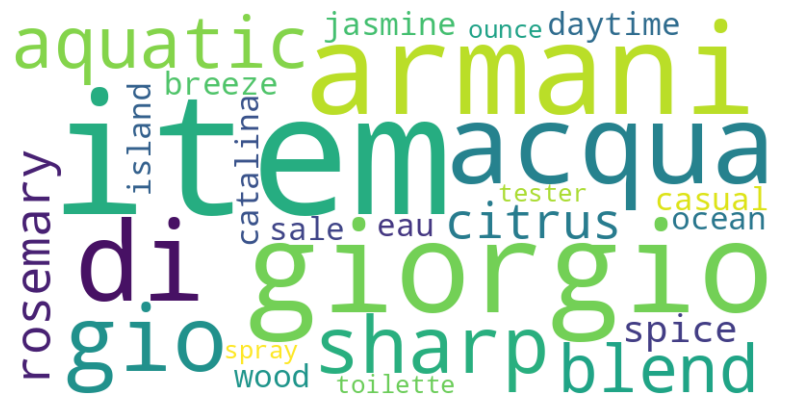

In [135]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_n_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
filtered_df_low['feat_doc'] = filtered_df_low['features_processed'].apply(nlp)

In [129]:
df_sim_vw_low = filtered_df_low.copy()

# Calculate and store similarities using lambda functions
df_sim_vw_low['attr_1_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
df_sim_vw_low['attr_2_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
df_sim_vw_low['attr_3_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))

# Add a new column for the average similarity score
df_sim_vw_low['avg_sim_score'] = df_sim_vw_low[['attr_1_sim_score', 'attr_2_sim_score', 'attr_3_sim_score']].mean(axis=1)

df_sim_vw_low.groupby('Product ASIN')['avg_sim_score'].mean()

/tmp/ipykernel_3477/2742780224.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_low['attr_1_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][0].similarity(review_doc))
/tmp/ipykernel_3477/2742780224.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_low['attr_2_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][1].similarity(review_doc))
/tmp/ipykernel_3477/2742780224.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  df_sim_vw_low['attr_3_sim_score'] = df_sim_vw_low['review_doc'].apply(lambda review_doc: df_attr['attributes_doc'][2].similarity(review_doc))


Product ASIN
B000C213ES    0.387193
B000E7YK5K    0.367763
B000VOMZOY    0.371336
Name: avg_sim_score, dtype: float64

## Recommendation by Ratings

## High Rank Products

In [95]:
final_high_rank_df.sort_values(by=['product_ratings_num','product_ratings'])[:5]

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)"
25,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Austin Jacoby,"Reviewed in the United States on July 29, 2023",Will restock on this every chance I get,Decided to buy this after seeing a YouTube rea...,decided buy seeing youtube reaction video love...,"(decided, buy, seeing, youtube, reaction, vide..."
26,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on September 17,...",Useless,Fragrance smells great but don't last long at all,fragrance smell great last long,"(fragrance, smell, great, last, long)"
27,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Kt Nav,"Reviewed in the United States on March 12, 2023",So nice. Big bottle. Great value.,"The one bottle wasn’t arriving in time, seemed...",one bottle arriving time seemed delayed went s...,"(one, bottle, arriving, time, seemed, delayed,..."
28,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Reg,"Reviewed in the United States on August 14, 2023",Doesn't last long.,Not strong like the store brand. Same scent ju...,strong like store brand scent last long,"(strong, like, store, brand, scent, last, long)"


In [96]:
final_high_rank_df[['Product ASIN', 'product_name','product_price','product_ratings','product_ratings_num','product_features']].sort_values(by='product_ratings', ascending=False).head(3)


,Product ASIN,product_name,product_price,product_ratings,product_ratings_num,product_features
1152,B000E7YK5K,"Acqua Di Gio By Giorgio Armani for Men, Eau De...",64,4.7,13078,Fragrance Family: Earthy & Woody\nTop Note: Ma...
935,B000XE15VG,Adidas Moves for Men Eau de Toilette Spray 1.6...,15,4.7,9004,MAKE YOUR MOVE: Wear ADIDAS Moves for Him Eau ...
362,B000C213ES,Acqua Di Gio Pour Homme By Giorgio Armani Eau-...,64,4.7,4384,"Introduced by Giorgio Armani in 1997, Acqua Di..."


In [97]:
grp = final_high_rank_df.sort_values(by=['product_ratings_num','product_ratings'])
grp.drop_duplicates(subset=['Product ASIN',	'product_name',	'product_price',	'product_ratings',	'product_ratings_num'	,'product_features']).head(3)

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
24,I Am King by Sean John for Men - 3.4 Ounce EDT...,B0020MMGRQ,3663,All our fragrances are 100% originals by their...,4.5,24,176.0,100-199,Amazon Customer,"Reviewed in the United States on October 7, 2023",Very Sexy Scent for Men,Clean and not over powering.,clean powering,"(clean, powering)"
149,adidas Team Five Special Edition Eau De Toilet...,B00DB47CN0,4248,Packaging may vary\nThis Item is not a Tester\...,4.5,11,150.0,100-199,Mário Roberto Bolito,"Reviewed in the United States on September 3, ...",Value of money,I love this fragrance. Is a good option for us...,love fragrance good option use work,"(love, fragrance, good, option, use, work)"
254,Antonio Banderas Perfumes - The Golden Secret ...,B00J4SRE7G,4347,Design House: Antonio Banderas\nFragrance Note...,4.4,23,144.0,100-199,Sara Cuevas,"Reviewed in the United States on October 3, 2023",excelente,excelente,excelente,(excelente)


## Low Rank Products

In [98]:
final_low_rank_df.sort_values(by=['product_ratings_num','product_ratings'])[:5]

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
6,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,DEREK,"Reviewed in the United States on September 28,...",Pure Sex,The absolute best cologne in my 14-piece colle...,absolute best cologne piece collection intoxic...,"(absolute, best, cologne, piece, collection, i..."
7,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Iben Alvarez Marrero,"Reviewed in the United States on October 7, 2023",Iben,Good item,good item,"(good, item)"
8,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,Kevin Flores,"Reviewed in the United States on October 5, 2023",Smell,This perfume smell really good. Smelling same ...,perfume smell really good smelling like perfum...,"(perfume, smell, really, good, smelling, like,..."
30,"Afnan Rare Carbon Eau De Parfum Spray for Men,...",B0CCJYTSMD,4,Rare Carbon by Afnan is a Leather fragrance fo...,4.7,34,1615.5,1600-1699,Courtney Stacy,"Reviewed in the United States on August 19, 2023",Ombre Leather Dupe,I was honestly skeptical about this actually b...,honestly skeptical actually dupe definitely sm...,"(honestly, skeptical, actually, dupe, definite..."
23,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,Joe Zhereb,"Reviewed in the United States on August 25, 2023",Has become an instant favorite of mine,I’ve been using this cologne for over a week n...,using cologne week become favorite go especial...,"(using, cologne, week, become, favorite, go, e..."


In [99]:
final_low_rank_df[['Product ASIN', 'product_name','product_price','product_ratings','product_ratings_num','product_features']].sort_values(by='product_ratings', ascending=False).head(3)


,Product ASIN,product_name,product_price,product_ratings,product_ratings_num,product_features
6,B0CGMRVRWF,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,34,5.0,2,Rare Carbon by Afnan is a Leather fragrance fo...
8,B0CGMRVRWF,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,34,5.0,2,Rare Carbon by Afnan is a Leather fragrance fo...
23,B08XVXJVSG,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",75,5.0,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...


In [100]:
grp = final_low_rank_df.sort_values(by=['product_ratings_num','product_ratings'])
grp.drop_duplicates(subset=['Product ASIN',	'product_name',	'product_price',	'product_ratings',	'product_ratings_num'	,'product_features']).head(3)

,product_name,Product ASIN,product_ratings_num,product_features,product_ratings,product_price,rank,rank_bin,reviewer_name,reviewer_date,reviewer_title,review_body,review_processed,review_doc
6,Afnan Rare Carbon (INSPİRED BY OMBRE LEATHER) ...,B0CGMRVRWF,2,Rare Carbon by Afnan is a Leather fragrance fo...,5.0,34,1629.0,1600-1699,DEREK,"Reviewed in the United States on September 28,...",Pure Sex,The absolute best cologne in my 14-piece colle...,absolute best cologne piece collection intoxic...,"(absolute, best, cologne, piece, collection, i..."
30,"Afnan Rare Carbon Eau De Parfum Spray for Men,...",B0CCJYTSMD,4,Rare Carbon by Afnan is a Leather fragrance fo...,4.7,34,1615.5,1600-1699,Courtney Stacy,"Reviewed in the United States on August 19, 2023",Ombre Leather Dupe,I was honestly skeptical about this actually b...,honestly skeptical actually dupe definitely sm...,"(honestly, skeptical, actually, dupe, definite..."
23,"Luxedore ALPHA, Perfume Classic, Eau De Parfum...",B08XVXJVSG,4,ALPHA Legacy Edition by Luxedore for Men 2.03 ...,5.0,75,1615.5,1600-1699,Joe Zhereb,"Reviewed in the United States on August 25, 2023",Has become an instant favorite of mine,I’ve been using this cologne for over a week n...,using cologne week become favorite go especial...,"(using, cologne, week, become, favorite, go, e..."
